# Hackerearth Twitter Sentiment Analysis #

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset 

train = pd.read_csv('train.csv')

test =pd.read_csv('test.csv')

In [3]:
train.head()

,id,original_text,lang,retweet_count,original_author,sentiment_class
0,1.245025e+18,Happy #MothersDay to all you amazing mothers o...,en,0,BeenXXPired,0
1,1.245759e+18,Happy Mothers Day Mum - I'm sorry I can't be t...,en,1,FestiveFeeling,0
2,1.246087e+18,Happy mothers day To all This doing a mothers ...,en,0,KrisAllenSak,-1
3,1.244803e+18,Happy mothers day to this beautiful woman...ro...,en,0,Queenuchee,0
4,1.244876e+18,Remembering the 3 most amazing ladies who made...,en,0,brittan17446794,-1


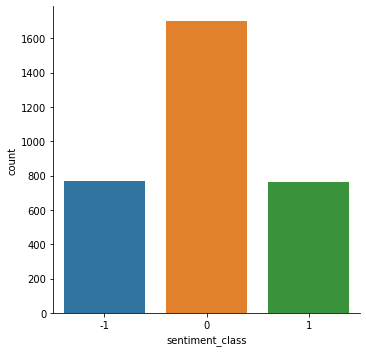

In [4]:
# class imbalance 

sns.catplot('sentiment_class',data=train,kind='count')

# there is some sort of class imbalance wherein appx 50% of the sentiments belong to neutral 
# and only 25% and 25# belong to positive and negative

In [5]:
# lets check author names 

original_authors_train = pd.DataFrame(train['original_author'].value_counts())

original_authors_train['original_author'].head(320)

# appx 300 users have more than 1 tweets 

#lets perform a join operation to see how do their sentiments vary original author wise 

train.groupby(['original_author','sentiment_class'])['id'].count().tail(40)

# we do see some variation here like same used sometimes has positive and neutral tweets 
# but mostly users who are tweeting neutral tend to tweet neutral

# thus we can think of the authors being a good feature

original_author  sentiment_class
unicorn_little_   0                 1
vaibhavGhevde     0                 1
vaohti           -1                 1
vicebusting       1                 1
vintagerenewed    0                 1
vintagobsession   0                 1
                  1                 1
vishwas211085     0                 1
vocalbeing        0                 1
waelmusaa         0                 1
wakingupfree      1                 1
walkingSpegiddo  -1                 1
waltersjewelers  -1                 1
                  0                 1
warnerbrostv      0                 1
wellsleeprelax    0                 2
whitebrownsugar   0                 1
wifewithgirls    -1                 1
                  0                 1
wiililsunflower   0                 1
windowtonews     -1                 1
womenswordtoday   1                 1
wonderBmarie     -1                 1
wow10shop         1                 1
wwwgalelaurecom   0                 1
wyann            

In [6]:
# lets now check retweet count distribution
train[False == train['retweet_count'].str.contains(r'[a-zA-Z]')].groupby(['sentiment_class','retweet_count'])['id'].count().head(60)

sentiment_class  retweet_count
-1               0                 639
                 1                  81
                 10                  1
                 11                  2
                 16                  1
                 17                  1
                 18                  1
                 2                  16
                 28                  1
                 3                   6
                 32                  1
                 35                  1
                 4                   5
                 5                   5
                 6                   2
                 61                  1
                 7                   2
                 8                   2
                 9                   1
 0               -0.057256529        1
                 -0.1417566007       1
                 -0.3101107397       1
                 -0.3643299313       1
                 -0.4199361695       1
                 -0.4666353157   

In [123]:
feature_retweet = pd.to_numeric(train[False == train['retweet_count'].str.contains(r'[a-zA-Z]')]['retweet_count']).round().abs()

In [124]:
feature_retweet[True == train['retweet_count'].str.contains(r'[a-zA-Z]')] = 0

In [125]:
feature_retweet.isnull().sum()

0

In [7]:
train[False == train['retweet_count'].str.contains(r'[a-zA-Z]')][train['sentiment_class']==1].groupby(['sentiment_class','retweet_count'])['id'].count()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


sentiment_class  retweet_count
1                0                636
                 1                 61
                 10                 1
                 118                1
                 14                 2
                 15                 1
                 18                 2
                 2                 22
                 20                 1
                 21                 1
                 24                 1
                 25                 1
                 3                 15
                 32                 1
                 37                 1
                 4                  7
                 45                 1
                 5                  4
                 6                  3
                 8                  3
Name: id, dtype: int64

In [8]:
# its not very apparent whether tweet count will play a major role or not but for the moment lets retain it

# lets now move on to language 

print(train['lang'].value_counts())

print(test['lang'].value_counts())

# we see that there is some moise in the data however we can safely assume that all the tweets are in english 
# as it appear from the count and the tweets hence se can disregard language being a factor

en                            2994
 pink Peruvian opal! via         4
 Find More                       2
&gt                              2
WORLDS OKAYEST MOTHER! &lt       2
                              ... 
0.0903948317                     1
0.8644551076                     1
0.8835719655                     1
0.3342376633                     1
-0.6792288222                    1
Name: lang, Length: 232, dtype: int64
en                            1304
 pink Peruvian opal! via         3
WORLDS OKAYEST MOTHER! &lt       2
0.6732931884                     1
 !                               1
                              ... 
0.1293615274                     1
-0.3629539266                    1
-0.5367241103                    1
-0.6367165569                    1
 others not as lucky!            1
Name: lang, Length: 81, dtype: int64


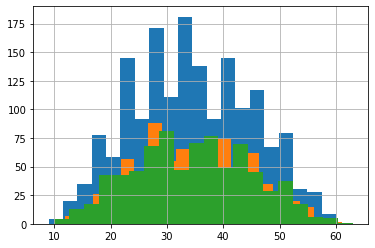

In [402]:
# lets finally move on to studying tweet texts 

# length 

train[train['sentiment_class']==0]['original_text'].str.split().apply(len).hist(bins = 20)

train[train['sentiment_class']==1]['original_text'].str.split().apply(len).hist(bins = 20)

train[train['sentiment_class']==-1]['original_text'].str.split().apply(len).hist(bins = 20)


# there is a fairly good distribution of text length 

In [403]:
train['original_text'].str.split()

0       [Happy, #MothersDay, to, all, you, amazing, mo...
1       [Happy, Mothers, Day, Mum, -, I'm, sorry, I, c...
2       [Happy, mothers, day, To, all, This, doing, a,...
3       [Happy, mothers, day, to, this, beautiful, wom...
4       [Remembering, the, 3, most, amazing, ladies, w...
                              ...                        
3230    [To, all, my, sisters, ,my, sisters, -in, -law...
3231    [Happy, Mother’s, Day, to, all, the, Mums,, St...
3232    [Happy, Mothers, Day, to, the, craziest, woman...
3233    [Happy, Mother's, Day, to, my, amazing, wife!,...
3234    [Wishing, you, all, a, safe, &, happy, Mothers...
Name: original_text, Length: 3235, dtype: object

In [404]:
# lets study count vectorizer  and see the words with highest occurance #
from sklearn.feature_extraction.text import CountVectorizer

In [405]:
vectorizer = CountVectorizer()

In [406]:
X=vectorizer.fit_transform(list(train['original_text']))

In [407]:
print(X.toarray().shape)

(3235, 14852)


##### we see that happy, mother, day will be repeated almost in every sentence ## it would be better not to have these as features or atleast have a lower weight for these #### 

##### lets start with TF-IDF vectorizer for this #####

In [408]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [409]:
tfidfvectorizer = TfidfVectorizer(max_df=1.0,min_df=1,max_features=2000)

In [410]:
X_train = tfidfvectorizer.fit_transform(list(train['original_text']))

In [411]:
X_train = X_train.toarray()

In [412]:
X_train = pd.DataFrame(data=X_train,index = np.arange(X_train.shape[0]),columns = np.arange(X_train.shape[1]))

In [413]:
from sklearn.manifold import TSNE

In [414]:
X_embedded = TSNE(n_components=2).fit_transform(X_train)
X_embedded.shape

(3235, 2)

In [415]:
X_embedded = pd.DataFrame(data=X_embedded,index = np.arange(X_embedded.shape[0]),columns = np.arange(X_embedded.shape[1]))

In [416]:
X_embedded['label'] = train['sentiment_class']

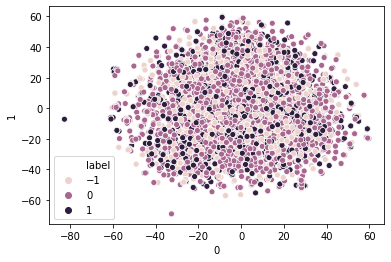

In [417]:
sns.scatterplot(x=0, y=1, hue="label",data=X_embedded)

In [418]:
# this clearly suggest there is not apparent pattern coming out with the help of tf idf # lets still try to model using various classifiers and see 
#their performance on the validation data

# Classifications task #

In [457]:
from sklearn.model_selection import train_test_split

from sklearn import preprocessing

from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix

In [458]:
X = X_train

X['retweet_count'] = feature_retweet

X['original_author'] = train['original_author']

X.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,retweet_count,text_length,original_author
0,0.361723,-0.120520,-0.048606,0.017691,0.050796,0.122869,0.034939,-0.010412,-0.112320,-0.007631,...,-0.023928,-0.027960,0.033968,0.042385,0.066477,0.084033,0.089099,0.0,43,BeenXXPired
1,0.220537,-0.035740,0.042841,0.004151,0.051587,0.105159,0.141905,-0.030509,-0.012663,0.045982,...,-0.043865,-0.006235,-0.091615,0.004625,-0.007375,0.060504,0.066088,1.0,60,FestiveFeeling
2,0.168721,-0.049946,0.036152,-0.053142,0.009540,0.023782,-0.002448,0.030933,-0.028071,-0.013800,...,0.006933,0.042144,-0.030849,0.003181,-0.042434,0.007334,0.007272,0.0,51,KrisAllenSak
3,0.150232,0.011785,0.026651,0.034889,-0.017905,-0.021725,-0.013864,0.067654,0.023174,-0.044513,...,0.025765,0.102970,0.025032,0.047281,-0.026531,0.046883,-0.046028,0.0,18,Queenuchee
4,0.231753,-0.056147,-0.024405,-0.076008,0.103895,-0.165174,0.039243,-0.053323,0.037902,-0.031689,...,-0.016597,0.038595,0.038200,0.010292,0.002773,-0.044504,0.033759,0.0,42,brittan17446794


In [459]:
le = preprocessing.LabelEncoder()

le.fit(X['original_author'])

le.classes_

X['original_author'] = le.transform(X['original_author'])

In [460]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,retweet_count,text_length,original_author
0,0.361723,-0.120520,-0.048606,0.017691,0.050796,0.122869,0.034939,-0.010412,-0.112320,-0.007631,...,-0.023928,-0.027960,0.033968,0.042385,0.066477,0.084033,0.089099,0.0,43,158
1,0.220537,-0.035740,0.042841,0.004151,0.051587,0.105159,0.141905,-0.030509,-0.012663,0.045982,...,-0.043865,-0.006235,-0.091615,0.004625,-0.007375,0.060504,0.066088,1.0,60,336
2,0.168721,-0.049946,0.036152,-0.053142,0.009540,0.023782,-0.002448,0.030933,-0.028071,-0.013800,...,0.006933,0.042144,-0.030849,0.003181,-0.042434,0.007334,0.007272,0.0,51,485
3,0.150232,0.011785,0.026651,0.034889,-0.017905,-0.021725,-0.013864,0.067654,0.023174,-0.044513,...,0.025765,0.102970,0.025032,0.047281,-0.026531,0.046883,-0.046028,0.0,18,718
4,0.231753,-0.056147,-0.024405,-0.076008,0.103895,-0.165174,0.039243,-0.053323,0.037902,-0.031689,...,-0.016597,0.038595,0.038200,0.010292,0.002773,-0.044504,0.033759,0.0,42,1018


In [461]:
X['text_length']=train['original_text'].str.split().apply(len)

In [462]:
X = X.fillna(0)

In [463]:
y = train['sentiment_class']

In [464]:
## splitting the data in train and test ###

In [465]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,stratify=y, random_state=42)

In [466]:
# logistic regression 

from sklearn.linear_model import LogisticRegression

In [467]:
clf = LogisticRegression(max_iter=10000)

model = clf.fit(X_train,y_train)

y_test = model.predict(X_test)

In [468]:
f1_score(pred_test,y_test,average='weighted')

0.7661804297714171

In [469]:
confusion_matrix(pred_test,y_test)

array([[  3,  60,   0],
       [  4, 669,   1],
       [  2,  69,   1]])

In [470]:
############# NB ############

In [471]:
from sklearn.naive_bayes import GaussianNB

In [472]:
clf = GaussianNB()

model = clf.fit(X_train,y_train)

y_test = model.predict(X_test)

In [473]:
f1_score(pred_test,y_test,average='weighted')

0.7630553031253527

In [474]:
confusion_matrix(pred_test,y_test)

array([[ 17,  43,   3],
       [ 53, 602,  19],
       [ 10,  54,   8]])

In [475]:
import lightgbm as lgbm

In [476]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [477]:
import lightgbm as lgbm

In [478]:
clf = lgbm.sklearn.LGBMClassifier()

model = clf.fit(X_train,y_train)

y_test = model.predict(X_test)

f1_score(pred_test,y_test,average='weighted')

0.7531580769582931

In [479]:
confusion_matrix(pred_test,y_test)

array([[ 15,  42,   6],
       [ 45, 581,  48],
       [  5,  53,  14]])

In [480]:
############## Let's create a setup to calculate an #########

##we will be combining the train and test data and then prepare a common tf-idf##

In [481]:
from sklearn.decomposition import TruncatedSVD

In [482]:
Full_data = train.drop('sentiment_class',axis=1)

In [483]:
Full_data = pd.concat([Full_data,test],ignore_index=True)

In [485]:
tfidfvectorizer = TfidfVectorizer(max_df=1.0,min_df=1,max_features=20000)
Y = tfidfvectorizer.fit_transform(list(Full_data['original_text']))

svd = TruncatedSVD(n_components=50, n_iter=7, random_state=42)
X = svd.fit_transform(Y)

X = pd.DataFrame(data=X,index = np.arange(X.shape[0]),columns = np.arange(X.shape[1]))

In [486]:
feature_retweet = pd.to_numeric(Full_data[False == Full_data['retweet_count'].str.contains(r'[a-zA-Z]')]['retweet_count']).round().abs()

In [487]:
X['retweet_count'] =feature_retweet

In [488]:
X['text_length']=Full_data['original_text'].str.split().apply(len)

In [489]:
le = preprocessing.LabelEncoder()

le.fit(Full_data['original_author'])

le.classes_

X['original_author'] = le.transform(Full_data['original_author'])

In [490]:
X_train = X[:train.shape[0]]

In [491]:
X_test = X[train.shape[0]:]

In [492]:
y_train = train['sentiment_class']

In [493]:
clf = lgbm.sklearn.LGBMClassifier(random_state=42)

model = clf.fit(X_train,y_train)

y_train_pred = model.predict(X_train)

f1_score(y_train_pred,y_train,average='weighted')

0.9925907965872541

In [494]:
pred = model.predict(X_test)
sub=pd.DataFrame()
sub['id'] = test['id']
sub['sentiment_class'] = pred
sub.head()
sub.to_csv('submission.csv',index=False)

In [498]:
# this should be our baseline --- test score 41.92 ----- weighted F1 

In [503]:
####################### Lets now perform the cleaning of text ##########################

# we are going to perform following steps 

# Remove punctuations
# Tokenization - Converting a sentence into list of words
# Remove stopwords
# Lammetization/stemming - Tranforming any form of a word to its root word

import nltk 
import string
import re

In [504]:
# removing punctuations 

tweets = Full_data['original_text']

In [505]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [506]:
def remove_punct(tweet):
    tweet  = "".join([char for char in tweet if char not in string.punctuation])
    tweet = re.sub('[0-9]+', '', tweet)
    return tweet

tweets = tweets.apply(lambda x: remove_punct(x))
tweets.head(10)

0    Happy MothersDay to all you amazing mothers ou...
1    Happy Mothers Day Mum  Im sorry I cant be ther...
2    Happy mothers day To all This doing a mothers ...
3    Happy mothers day to this beautiful womanroyal...
4    Remembering the  most amazing ladies who made ...
5    HAPPY MOTHER’S DAY BRATZ WORLD FAMILIEZ YASMIN...
6    Happy Mother’s Day to all you wonderful mums o...
7    Show me a mother of two as sexy as Rosie Happy...
8    To all the mothers grandmothers aunts sisters ...
9    To all the mothers around the World Gas To Hea...
Name: original_text, dtype: object

In [507]:
def tokenization(tweet):
    tweet = re.split('\W+', tweet)
    return tweet

tweets = tweets.apply(lambda x: tokenization(x))
tweets.head()

0    [Happy, MothersDay, to, all, you, amazing, mot...
1    [Happy, Mothers, Day, Mum, Im, sorry, I, cant,...
2    [Happy, mothers, day, To, all, This, doing, a,...
3    [Happy, mothers, day, to, this, beautiful, wom...
4    [Remembering, the, most, amazing, ladies, who,...
Name: original_text, dtype: object

In [509]:
stopwords = nltk.corpus.stopwords.words('english')

In [512]:
def remove_stopwords(tweet):
    tweet = [word for word in tweet if word not in stopwords]
    return tweet

In [513]:
tweets = tweets.apply(lambda x: remove_stopwords(x))
tweets.head(10)

0    [Happy, MothersDay, amazing, mothers, I, know,...
1    [Happy, Mothers, Day, Mum, Im, sorry, I, cant,...
2    [Happy, mothers, day, To, This, mothers, days,...
3    [Happy, mothers, day, beautiful, womanroyalty,...
4    [Remembering, amazing, ladies, made, I, My, la...
5    [HAPPY, MOTHER, S, DAY, BRATZ, WORLD, FAMILIEZ...
6    [Happy, Mother, Day, wonderful, mums, mothersd...
7    [Show, mother, two, sexy, Rosie, Happy, Mother...
8    [To, mothers, grandmothers, aunts, sisters, wo...
9    [To, mothers, around, World, Gas, To, Health, ...
Name: original_text, dtype: object

In [514]:
ps = nltk.PorterStemmer()

def stemming(tweet):
    tweet = [ps.stem(word) for word in tweet]
    return tweet

tweets = tweets.apply(lambda x: stemming(x))
tweets.head()

0    [happi, mothersday, amaz, mother, I, know, har...
1    [happi, mother, day, mum, Im, sorri, I, cant, ...
2    [happi, mother, day, To, thi, mother, day, wor...
3    [happi, mother, day, beauti, womanroyalti, soo...
4    [rememb, amaz, ladi, made, I, My, late, grandm...
Name: original_text, dtype: object

In [515]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(tweet):
    tweet = [wn.lemmatize(word) for word in tweet]
    return tweet

tweets = tweets.apply(lambda x: lemmatizer(x))
tweets.head()

0    [happi, mothersday, amaz, mother, I, know, har...
1    [happi, mother, day, mum, Im, sorri, I, cant, ...
2    [happi, mother, day, To, thi, mother, day, wor...
3    [happi, mother, day, beauti, womanroyalti, soo...
4    [rememb, amaz, ladi, made, I, My, late, grandm...
Name: original_text, dtype: object

In [516]:
tweets = tweets.apply(lambda x: ' '.join(x))
tweets.head()

0    happi mothersday amaz mother I know hard abl s...
1    happi mother day mum Im sorri I cant bring mot...
2    happi mother day To thi mother day work today ...
3    happi mother day beauti womanroyalti sooth mum...
4    rememb amaz ladi made I My late grandmoth iri ...
Name: original_text, dtype: object

In [1121]:
############## Let's create a setup to calculate an #########

##we will be combining the train and test data and then prepare a common tf-idf##

# lgbm  - 43.9

# 2000 top words in tfidf vector

# 45 - dimension after truncatedSVD

# XGB - 44.43 rank 26

# 2000 - top words in tfidf vector (features)
#50 - dimension after truncatedSVD


In [1122]:
from sklearn.decomposition import TruncatedSVD

In [1123]:
Full_data_cleaned = Full_data.copy()

In [1124]:
Full_data_cleaned['original_text']=tweets

In [1125]:
Full_data_cleaned['original_text'].head()

0    happi mothersday amaz mother I know hard abl s...
1    happi mother day mum Im sorri I cant bring mot...
2    happi mother day To thi mother day work today ...
3    happi mother day beauti womanroyalti sooth mum...
4    rememb amaz ladi made I My late grandmoth iri ...
Name: original_text, dtype: object

In [1126]:
tfidfvectorizer = TfidfVectorizer(max_df=1.0,min_df=1,max_features=2000)
Y = tfidfvectorizer.fit_transform(list(Full_data['original_text']))

svd = TruncatedSVD(n_components=50, n_iter=7, random_state=42)
X = svd.fit_transform(Y)

X = pd.DataFrame(data=X,index = np.arange(X.shape[0]),columns = np.arange(X.shape[1]))

In [1127]:
feature_retweet = pd.to_numeric(Full_data[False == Full_data['retweet_count'].str.contains(r'[a-zA-Z]')]['retweet_count']).round().abs()

In [1128]:
X['retweet_count'] =feature_retweet

In [1129]:
X['text_length']=Full_data['original_text'].str.split().apply(len)

In [1130]:
le = preprocessing.LabelEncoder()

le.fit(Full_data['original_author'])

le.classes_

X['original_author'] = le.transform(Full_data['original_author'])

In [1131]:
X_train = X[:train.shape[0]]

In [1132]:
X_test = X[train.shape[0]:]

In [1133]:
y_train = train['sentiment_class']

In [1134]:
clf = lgbm.sklearn.LGBMClassifier(random_state=42)

model = clf.fit(X_train,y_train)

y_train_pred = model.predict(X_train)

f1_score(y_train_pred,y_train,average='weighted')

0.9932039654730315

In [1135]:
pred = model.predict(X_test)
sub=pd.DataFrame()
sub['id'] = test['id']
sub['sentiment_class'] = pred
sub.head()
sub.to_csv('submission.csv',index=False)

In [1136]:
import xgboost

In [1137]:
clf = xgboost.sklearn.XGBClassifier(random_state=42)

model = clf.fit(X_train,y_train)

y_train_pred = model.predict(X_train)

f1_score(y_train_pred,y_train,average='weighted')

0.9987635634776251

In [1138]:
pred = model.predict(X_test)
sub=pd.DataFrame()
sub['id'] = test['id']
sub['sentiment_class'] = pred
sub.head()
sub.to_csv('submission.csv',index=False)

In [1113]:
################## LGBM and RF ensemble stacking and xgb as final estimator #######################


#### this configuration failed badly ##########

####### also we could have tried other models like bert ###### 
####### but lets stop here ###############

In [1114]:
from sklearn.ensemble import StackingClassifier

In [1115]:
from sklearn.ensemble import RandomForestClassifier

In [1116]:
X_train=X_train.fillna(0)

In [1117]:
estimators = [
    ('lgb', lgbm.sklearn.LGBMClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))]

clf = StackingClassifier(
        estimators=estimators,passthrough=True, final_estimator=xgboost.XGBClassifier(random_state=42)
 )

model = clf.fit(X_train, y_train)

In [1118]:
y_train_pred = model.predict(X_train)

f1_score(y_train_pred,y_train,average='weighted')

0.710246029010065

In [1119]:
X_test=X_test.fillna(0)

In [1120]:
pred = model.predict(X_test)
sub=pd.DataFrame()
sub['id'] = test['id']
sub['sentiment_class'] = pred
sub.head()
sub.to_csv('submission.csv',index=False)